# Traffic Tickets - Floridablanca - Santander - Colombia

In [181]:

#import libraries
import pandas as pd
from pathlib import Path
import os
import numpy as np
import seaborn as sns

In [182]:
#load and read data

root= Path(".").resolve().parent
filename= "Comparendos_20240305.csv"
datapath= os.path.join(root,'data','raw',filename)

dfcomp=pd.read_csv(datapath)



### This dataset contain data about traffic tickets by traffic agents (Policia de Transito) from Floridablanca, Colombia
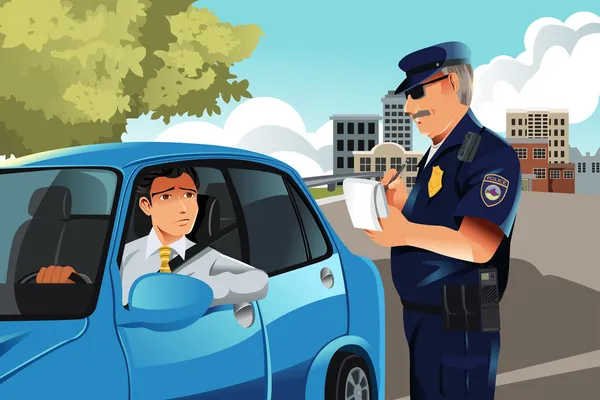


In [183]:
dfcomp.head()

,Fecha,Estado,Clase,Servicio,Fuente comparendo,Infracción,Lugar infracción
0,10/21/2022 12:00:00 AM,Pagado,MOTOCICLETA,Particular,Comparendera Electrónica Simit,C03,LA CAVA
1,10/21/2022 12:00:00 AM,Pagado,MOTOCICLETA,Particular,Comparendera Electrónica Simit,C02,26 10
2,10/21/2022 12:00:00 AM,Pagado,MOTOCICLETA,Particular,Comparendera Electrónica Simit,C02,Floridablanca
3,10/21/2022 12:00:00 AM,Pagado,AUTOMOVIL,Particular,Comparendera Electrónica Simit,C02,20 FOSUNAB
4,10/21/2022 12:00:00 AM,Resolucion,MOTOCICLETA,Particular,Comparendera Electrónica Simit,C02,20 94


In [184]:
### check the datypes, shapes and dimensions
dfcomp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15227 entries, 0 to 15226
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Fecha              15227 non-null  object
 1   Estado             15227 non-null  object
 2   Clase              15227 non-null  object
 3   Servicio           15227 non-null  object
 4   Fuente comparendo  15227 non-null  object
 5   Infracción         15227 non-null  object
 6   Lugar  infracción  15227 non-null  object
dtypes: object(7)
memory usage: 832.9+ KB


In [185]:
print("dfcomp_shape: ",dfcomp.shape)
print('dfcomp_dimensions: ',dfcomp.ndim)

dfcomp_shape:  (15227, 7)
dfcomp_dimensions:  2


### we can think that don't exist something for clean, but first we must to do the data explore
# 1. Evalute possible data missing

In [186]:

#take a df copy
dfmissing=dfcomp.copy()
nulls=dfmissing.isnull().sum()
nulls=nulls.sum()
print('count_nulls: ',nulls)

count_nulls:  0


# 2. Check data types
### Above we can see that all data types are objects, but we have in this dataset a feature belong similar
### to date type

In [187]:
#the fecha isn't valid format
# we have m/d/y hh:mm pm/am
#so like Fecha is object, we can do a split and parsed after

#split
fecha_parsed=dfcomp.Fecha.str.split(" ",n=3,expand=True)
#rename columns
fecha_parsed.rename(columns={0:'Fecha_parsed',1:'Time',2:"Franja"},inplace=True)

fecha_parsed.head(2)


,Fecha_parsed,Time,Franja
0,10/21/2022,12:00:00,AM
1,10/21/2022,12:00:00,AM


In [188]:
#now concat dataframes

dfv1=pd.concat([dfcomp,fecha_parsed], axis=1)

#date_lengths = dfv1.Fecha_parsed.str.len()
#print(date_lengths.value_counts(),'\n')
#indices = np.where([date_lengths == 10])[1]
#print('Indices with corrupted data:', indices)


In [189]:
dfv1['Fecha_parsed']= pd.to_datetime(dfv1['Fecha_parsed'],format="%m/%d/%Y")
dfv1['Fecha_parsed'].head()

0   2022-10-21
1   2022-10-21
2   2022-10-21
3   2022-10-21
4   2022-10-21
Name: Fecha_parsed, dtype: datetime64[ns]

In [190]:
#check data type
dfv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15227 entries, 0 to 15226
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              15227 non-null  object        
 1   Estado             15227 non-null  object        
 2   Clase              15227 non-null  object        
 3   Servicio           15227 non-null  object        
 4   Fuente comparendo  15227 non-null  object        
 5   Infracción         15227 non-null  object        
 6   Lugar  infracción  15227 non-null  object        
 7   Fecha_parsed       15227 non-null  datetime64[ns]
 8   Time               15227 non-null  object        
 9   Franja             15227 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 1.2+ MB


### the data parsed, the data types are ok each feature have correct data type

# 3. Create new features
### Now, we're going to find some features, where we can expand, this features are category, we're going to create some features dummies (one_hot_encoder)

In [191]:
#we going to check how many unique values there is in each features, 
#if we have more 10 unique value we will be create one_hot_encode from this feature
dfv1['Estado'].value_counts()

Estado
Pagado                     7644
Resolucion                 6586
Cese                        316
Asistencia a curso          205
Exonerados                  192
Pendiente                   185
En Audiencia                 54
Pendiente menor de edad      33
Acuerdo de Pago               9
ANULADO                       3
Name: count, dtype: int64

In [192]:
dfv1['Servicio'].value_counts()

Servicio
Particular         14346
Público              736
sin identificar      112
Oficial               26
Diplomático            7
Name: count, dtype: int64

In [193]:
#Get dummies
dfv2=pd.get_dummies(dfv1['Servicio'],prefix="Srv_",dtype='int')
dfv2

,Srv__Diplomático,Srv__Oficial,Srv__Particular,Srv__Público,Srv__sin identificar
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
15222,0,0,1,0,0
15223,0,0,1,0,0
15224,0,0,1,0,0
15225,0,0,1,0,0


In [194]:
#Eliminate features after create the dummy features
dfv1.drop('Fecha',axis=1,inplace=True)
dfv1.drop('Servicio',axis=1,inplace=True)
dfv1.head()

,Estado,Clase,Fuente comparendo,Infracción,Lugar infracción,Fecha_parsed,Time,Franja
0,Pagado,MOTOCICLETA,Comparendera Electrónica Simit,C03,LA CAVA,2022-10-21,12:00:00,AM
1,Pagado,MOTOCICLETA,Comparendera Electrónica Simit,C02,26 10,2022-10-21,12:00:00,AM
2,Pagado,MOTOCICLETA,Comparendera Electrónica Simit,C02,Floridablanca,2022-10-21,12:00:00,AM
3,Pagado,AUTOMOVIL,Comparendera Electrónica Simit,C02,20 FOSUNAB,2022-10-21,12:00:00,AM
4,Resolucion,MOTOCICLETA,Comparendera Electrónica Simit,C02,20 94,2022-10-21,12:00:00,AM


In [195]:
# concat df data with df dummies
dfv3=pd.concat([dfv1,dfv2],axis=1)
dfv3.head()

,Estado,Clase,Fuente comparendo,Infracción,Lugar infracción,Fecha_parsed,Time,Franja,Srv__Diplomático,Srv__Oficial,Srv__Particular,Srv__Público,Srv__sin identificar
0,Pagado,MOTOCICLETA,Comparendera Electrónica Simit,C03,LA CAVA,2022-10-21,12:00:00,AM,0,0,1,0,0
1,Pagado,MOTOCICLETA,Comparendera Electrónica Simit,C02,26 10,2022-10-21,12:00:00,AM,0,0,1,0,0
2,Pagado,MOTOCICLETA,Comparendera Electrónica Simit,C02,Floridablanca,2022-10-21,12:00:00,AM,0,0,1,0,0
3,Pagado,AUTOMOVIL,Comparendera Electrónica Simit,C02,20 FOSUNAB,2022-10-21,12:00:00,AM,0,0,1,0,0
4,Resolucion,MOTOCICLETA,Comparendera Electrónica Simit,C02,20 94,2022-10-21,12:00:00,AM,0,0,1,0,0


In [196]:
dfv2_2=pd.get_dummies(dfv3['Estado'], prefix='Est',dtype='int')
dfv3=pd.concat([dfv3,dfv2_2],axis=1)
dfv3.drop('Estado',axis=1,inplace=True)
dfv3.head()

,Clase,Fuente comparendo,Infracción,Lugar infracción,Fecha_parsed,Time,Franja,Srv__Diplomático,Srv__Oficial,Srv__Particular,...,Est_ANULADO,Est_Acuerdo de Pago,Est_Asistencia a curso,Est_Cese,Est_En Audiencia,Est_Exonerados,Est_Pagado,Est_Pendiente,Est_Pendiente menor de edad,Est_Resolucion
0,MOTOCICLETA,Comparendera Electrónica Simit,C03,LA CAVA,2022-10-21,12:00:00,AM,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,MOTOCICLETA,Comparendera Electrónica Simit,C02,26 10,2022-10-21,12:00:00,AM,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,MOTOCICLETA,Comparendera Electrónica Simit,C02,Floridablanca,2022-10-21,12:00:00,AM,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,AUTOMOVIL,Comparendera Electrónica Simit,C02,20 FOSUNAB,2022-10-21,12:00:00,AM,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,MOTOCICLETA,Comparendera Electrónica Simit,C02,20 94,2022-10-21,12:00:00,AM,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [197]:
dfv3['Clase'].value_counts()

Clase
MOTOCICLETA                   10419
AUTOMOVIL                      3238
CAMIONETA                       485
BUSETA                          458
CAMPERO                         147
CAMION                          140
BUS                             117
MICROBUS                        104
SIN IDENTIFICAR                  70
TRACTOCAMION                     33
MOTOCARRO                         7
VOLQUETA                          3
MOTOTRICICLO                      2
BICICLETA                         2
SIN CLASE                         1
MAQ. CONSTRUCCION O MINERA        1
Name: count, dtype: int64

In [198]:
dfv3['Fuente comparendo'].value_counts()
dfv2_3=pd.get_dummies(dfv3['Fuente comparendo'], prefix='Fue', dtype='int')
dfv2_4=pd.get_dummies(dfv3['Clase'], prefix='Cla', dtype='int')
df_f=pd.concat([dfv3,dfv2_3,dfv2_4], axis=1)
df_f.drop(['Clase','Fuente comparendo'],axis=1,inplace=True)
df_f.head()

,Infracción,Lugar infracción,Fecha_parsed,Time,Franja,Srv__Diplomático,Srv__Oficial,Srv__Particular,Srv__Público,Srv__sin identificar,...,Cla_CAMPERO,Cla_MAQ. CONSTRUCCION O MINERA,Cla_MICROBUS,Cla_MOTOCARRO,Cla_MOTOCICLETA,Cla_MOTOTRICICLO,Cla_SIN CLASE,Cla_SIN IDENTIFICAR,Cla_TRACTOCAMION,Cla_VOLQUETA
0,C03,LA CAVA,2022-10-21,12:00:00,AM,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,C02,26 10,2022-10-21,12:00:00,AM,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,C02,Floridablanca,2022-10-21,12:00:00,AM,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,C02,20 FOSUNAB,2022-10-21,12:00:00,AM,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C02,20 94,2022-10-21,12:00:00,AM,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [199]:
df_f.columns[1]
len(df_f['Lugar  infracción'].value_counts().unique())

58

In [200]:
df_f['Time'].value_counts()

Time
12:00:00    15227
Name: count, dtype: int64

In [201]:
df_f.drop('Time',axis=1,inplace=True)

In [202]:
df_f.shape

(15227, 39)

### Now we have a complete dataframe,that already have been ready for fit